This notebook looks into the effect of amount of corner on the OOD Detection. Will train a classifier on the respective corner-case/random unseen dataset and then again check on the respective validation dataset downloded from the webdatacommons url

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [1]:
import sys
sys.version

'3.9.2 (default, Feb 28 2021, 17:03:44) \n[GCC 10.2.1 20210110]'

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def result(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    plt.figure().set_figwidth(0.5)
    plt.figure().set_figheight(3)
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['In-Dist','Out-Dist'],
            yticklabels=['In-Dist','Out-Dist'])
    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=15)

    plt.show()

    acc = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    print("Accuracy : ",acc)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("f1 : ",f1)

# Density-Based

In [6]:
filepath = "../../src/contrastive/results/density-based/wdcproductsmulti80cc20rnd000un-large-/"
filename = "Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_Roberta-base.csv"
energy_score_df1 = pd.read_csv(filepath + filename)
energy_score_df1.head(5)

,Unnamed: 0,actual,predicted
0,0,0,-9.968505
1,1,1,-8.609785
2,2,0,-9.433629
3,3,1,-7.340762
4,4,0,-10.454275


In [10]:
density_train_df = energy_score_df1.copy()
density_train_df["label"] = density_train_df["actual"]
density_train_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
density_train_df.head(3)

,Unnamed: 0,actual,predicted,label
0,0,0,-9.968505,0
1,1,1,-8.609785,1
2,2,0,-9.433629,0


Initializing the model

In [12]:
reg1 = setup(data = density_train_df, target = 'label',train_size=0.7)

In [14]:
best=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:52:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8529,0.9262,0.8371,0.8673,0.8505,0.7057,0.7082,0.5250
ridge,Ridge Classifier,0.8500,0.0000,0.8229,0.8735,0.8463,0.7000,0.7028,0.3570
lda,Linear Discriminant Analysis,0.8500,0.9262,0.8229,0.8735,0.8463,0.7000,0.7028,0.0230
nb,Naive Bayes,0.8486,0.9262,0.8229,0.8710,0.8450,0.6971,0.6999,0.3630
qda,Quadratic Discriminant Analysis,0.8486,0.9262,0.8229,0.8710,0.8450,0.6971,0.6999,0.3600
knn,K Neighbors Classifier,0.8343,0.9007,0.8429,0.8320,0.8349,0.6686,0.6724,0.3580
ada,Ada Boost Classifier,0.8329,0.9076,0.8314,0.8356,0.8326,0.6657,0.6671,0.3670
lightgbm,Light Gradient Boosting Machine,0.8286,0.9075,0.8257,0.8345,0.8278,0.6571,0.6604,0.9970
gbc,Gradient Boosting Classifier,0.8257,0.9115,0.8229,0.8317,0.8247,0.6514,0.6549,0.3440
svm,SVM - Linear Kernel,0.8243,0.0000,0.7714,0.8782,0.8125,0.6486,0.6646,0.3650


Loading the test set

In [16]:
energy_score_df2 = pd.read_csv('../../src/contrastive/results/Initial Analysis/Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_valid_large_Roberta-base.csv')
energy_score_df2.head(5)

,Unnamed: 0,actual,predicted
0,0,1,-8.278280
1,1,1,-7.514219
2,2,0,-10.370277
3,3,1,-8.734291
4,4,0,-9.899822


In [17]:
density_test_df = energy_score_df2.copy()
density_test_df["label"] = density_test_df["actual"]
density_test_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
density_test_df.head(3)

,predicted,label
0,-8.278280,1
1,-7.514219,1
2,-10.370277,0


In [18]:
lr = create_model('lr')
preds=predict_model(lr, data = density_test_df.drop(columns=["label"]))
preds

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:55:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,predicted,prediction_label,prediction_score
0,-8.278280,1,0.7033
1,-7.514219,1,0.9100
2,-10.370277,0,0.9573
3,-8.734291,0,0.5007
4,-9.899822,0,0.9017
...,...,...,...
995,-9.851101,0,0.8931
996,-10.360264,0,0.9565
997,-9.466063,0,0.8009
998,-8.767303,0,0.5163


<Figure size 36x288 with 0 Axes>

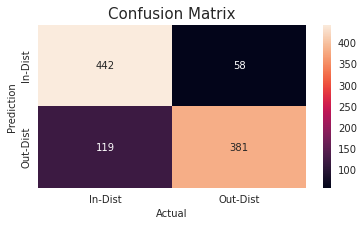

Accuracy :  0.823
Precision :  0.8678815489749431
Recall :  0.762
f1 :  0.8115015974440896


In [19]:
y_target = density_test_df["label"]
y_pred = preds["prediction_label"]
result(y_target ,y_pred)

In [28]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Distance-Based

Train data

In [20]:
filepath = "../../src/contrastive/results/distance-based/wdcproductsmulti80cc20rnd000un-large-/"
filename = "Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_Roberta-base.csv"
mahal_score_df1 = pd.read_csv(filepath + filename)
mahal_score_df1.head(5)

,Unnamed: 0,actual,predicted
0,0,0,0.065887
1,1,1,0.483735
2,2,0,0.289816
3,3,1,0.793431
4,4,0,0.124290


In [22]:
dist_train_df = mahal_score_df1.copy()
dist_train_df["label"] = dist_train_df["actual"]
dist_train_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
dist_train_df.head(3)

,predicted,label
0,0.065887,0
1,0.483735,1
2,0.289816,0


Test Data

In [21]:
filepath = "../../src/contrastive/results/distance-based/wdcproductsmulti80cc20rnd050un_valid_large.json-large-/"
filename = "Prob_Density_WDC_preprocessed_wdcproductsmulti80cc20rnd050un_valid_large_Roberta-base.csv"
mahal_score_df2 = pd.read_csv(filepath + filename)
mahal_score_df2.head(5)

,Unnamed: 0,actual,predicted
0,0,1,0.236001
1,1,1,2.377320
2,2,0,0.263565
3,3,1,0.226611
4,4,0,0.056131


In [23]:
dist_test_df = mahal_score_df2.copy()
dist_test_df["label"] = dist_test_df["actual"]
dist_test_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
dist_test_df.head(3)

,predicted,label
0,0.236001,1
1,2.377320,1
2,0.263565,0


In [24]:
reg2 = setup(data = dist_train_df, target = 'label',train_size=0.7)

In [25]:
best=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:55:56
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6943,0.7475,0.6657,0.7089,0.6838,0.3886,0.3922,0.3660
nb,Naive Bayes,0.6914,0.6677,0.4486,0.8765,0.5905,0.3829,0.4398,0.3530
ridge,Ridge Classifier,0.6914,0.0000,0.4629,0.8533,0.5984,0.3829,0.4309,0.3610
qda,Quadratic Discriminant Analysis,0.6914,0.6677,0.4486,0.8765,0.5905,0.3829,0.4398,0.3730
lda,Linear Discriminant Analysis,0.6914,0.7902,0.4629,0.8533,0.5984,0.3829,0.4309,0.0260
svm,SVM - Linear Kernel,0.6900,0.0000,0.5200,0.8279,0.6190,0.3800,0.4276,0.3600
lr,Logistic Regression,0.6886,0.7902,0.4914,0.8122,0.6102,0.3771,0.4111,0.5310
ada,Ada Boost Classifier,0.6743,0.7588,0.5286,0.7566,0.6130,0.3486,0.3705,0.3660
lightgbm,Light Gradient Boosting Machine,0.6743,0.7631,0.6543,0.6858,0.6657,0.3486,0.3531,1.0380
xgboost,Extreme Gradient Boosting,0.6600,0.7559,0.6400,0.6691,0.6493,0.3200,0.3244,0.4620


In [26]:
knn = create_model('knn')
preds=predict_model(knn, data = dist_test_df.drop(columns=["label"]))
preds

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:58:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,predicted,prediction_label,prediction_score
0,0.236001,1,0.8
1,2.377320,1,1.0
2,0.263565,0,0.6
3,0.226611,1,0.8
4,0.056131,0,1.0
...,...,...,...
995,0.556538,0,0.8
996,0.256931,0,0.8
997,1.043575,1,0.8
998,0.085562,0,0.8


<Figure size 36x288 with 0 Axes>

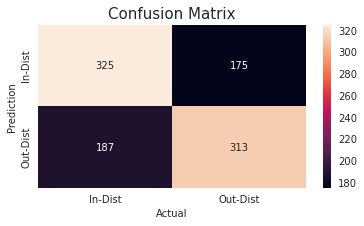

Accuracy :  0.638
Precision :  0.6413934426229508
Recall :  0.626
f1 :  0.6336032388663967


In [27]:
y_test = dist_test_df["label"]
y_pred = preds["prediction_label"]
result(y_test ,y_pred)

In [29]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification-Based